# Washington GDP PER CAPITA

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wa_df = pd.read_csv("../state_gdp/washington_gdp.csv")
# wa_df

In [3]:
# Only want the total industries
wa_df = wa_df.iloc[:1]

In [4]:
wa_df.drop(columns=['GeoName', 'Description'], inplace=True)
wa_df = wa_df.T
wa_df.head()

,0
2005:Q1,287547.6
2005:Q2,292316.2
2005:Q3,293460.5
2005:Q4,301379.6
2006:Q1,307950.6


In [5]:
wa_df = wa_df.iloc[36:]

In [6]:
wa_df.reset_index()

,index,0
0,2014:Q1,429419.3
1,2014:Q2,435640.1
2,2014:Q3,446928.1
3,2014:Q4,450604.4
4,2015:Q1,457749.9
5,2015:Q2,465354.0
6,2015:Q3,472109.2
7,2015:Q4,471545.8
8,2016:Q1,482608.7
9,2016:Q2,482090.8


In [7]:
wa_df.rename(columns = {0 : "gdp", "index": "year"}, inplace=True)

In [8]:
gdp_values = wa_df["gdp"].tolist()

## Create a function that will add the quarters together and then put them into a list

In [9]:
def get_total():
    years_totals = []
    quarter_1 = 0
    quarter_2 = 1
    quarter_3 = 2
    quarter_4 =3
    count = 1
    while count <= 8:  
        total = gdp_values[quarter_1] + gdp_values[quarter_2] + gdp_values[quarter_3] + gdp_values[quarter_4]
        years_totals.append(total)
        
        quarter_1 += 4
        quarter_2 += 4
        quarter_3 += 4
        quarter_4 += 4
        count += 1
    return years_totals

In [10]:
totals = get_total()

In [11]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": totals}
wa_gdp_year = pd.DataFrame(data)
# wa_gdp_year

 ## converting the abbreviated measurement from millions
 ### Data was abbreviate

In [12]:
gdp = wa_gdp_year["gdp"].tolist()

In [13]:
def actual_total():
    gdp_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = gdp[value]*1000000
        gdp_total.append(total)
        value += 1
        count += 1
    return gdp_total

In [14]:
act_gdp = actual_total()

In [15]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "gdp": act_gdp}
wa_gdp_year = pd.DataFrame(data)

## Import population data

In [16]:
pop_df = pd.read_csv("../state_pop/washington_population_cleaned.csv")
# pop_df

In [17]:
pop_df = pop_df.iloc[114:]

In [18]:
pop_df = pop_df.dropna()

## Converting population out of the thousands
### population was abbreviated

In [19]:
wa_pop = pop_df["washington_population"].tolist()

In [20]:
def actual_pop():
    pop_total = []
    value = 0
    count = 1 
    while count <= 8:
        total = wa_pop[value]*1000
        pop_total.append(total)
        value += 1
        count += 1
    return pop_total

In [21]:
act_pop = actual_pop()

In [22]:
data = {"year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       "population": act_pop}
wa_pop_year = pd.DataFrame(data)

## Merge both DS

In [23]:
merged_df = pd.merge(wa_gdp_year, wa_pop_year, how="outer", on=["year"])
merged_df

,year,gdp,population
0,2014,1.762592e+12,7057531.0
1,2015,1.866759e+12,7167287.0
2,2016,1.949100e+12,7299961.0
3,2017,2.079771e+12,7427951.0
4,2018,2.257923e+12,7526793.0
5,2019,2.391495e+12,7614024.0
6,2020,2.417015e+12,7718785.0
7,2021,2.670307e+12,7738692.0


## Finding GDP PER CAPITA of Washington

In [24]:
population_list = merged_df.population.to_list()

gdp_list = merged_df.gdp.to_list()

per_capita_list = []

#function to divide gdp by population

def per_capita():

    for population, gdp in zip(population_list, gdp_list):

        per_capita_list.append((gdp/population))
        
    return per_capita_list

## Inserting the per capita as a new column

In [25]:
per_capita_list = per_capita()

In [26]:
capita_data = {"gdp_per_capita": per_capita_list}
capita_column = pd.DataFrame(capita_data)

In [27]:
merged_df.insert(3, "gdp_per_capita", capita_column, True)

In [28]:
merged_df = pd.DataFrame(merged_df)

## Adding marijuana tax

In [29]:
wa_mj_tax = pd.read_csv("../marijuana_tax/washington_marijuana_cleaned.csv")
wa_mj_tax = pd.DataFrame(wa_mj_tax)

In [30]:
# I want the estimated state sales tax collection
wa_mj_tax

,Quarter of Activity2,Taxable retail sales as reported by cannabis collectives (before tax)3,Estimated retail value of cannabis and cannabis products sold at a licensed cannabis retailer (before tax)4,Total retail value of cannabis and cannabis products (before tax),Sales exempt from sales tax for medical purposes5,Estimated retail value of cannabis and cannabis products subject to state and local sales taxes,Estimated state sales tax collections,Weighted average local sales tax rate6,Estimated local sales tax collections
0,2014_3,"23,423,000","12,208,000","35,631,000",-,"35,631,000","2,316,000",2.47%,"880,000"
1,2014_4,"27,529,000","28,443,000","55,972,000",-,"55,972,000","3,638,000",2.47%,"1,382,000"
2,2014_5,"50,952,000","40,651,000","91,603,000",-,"91,603,000","5,954,000",NaN,"2,262,000"
3,2015_1,"31,473,000","50,545,000","82,018,000",-,"82,018,000","5,331,000",2.47%,"2,026,000"
4,2015_2,"35,477,000","88,435,000","123,912,000",-,"123,912,000","8,054,000",2.47%,"3,060,000"
5,2015_3,"23,495,000","104,631,000","128,126,000",-,"128,126,000","8,328,000",2.50%,"3,202,000"
6,2015_4,"21,269,000","113,964,000","135,233,000",-,"135,233,000","8,790,000",2.50%,"3,380,000"
7,2015_5,"111,714,000","357,575,000","469,289,000",-,"469,289,000","30,503,000",NaN,"11,668,000"
8,2016_1,"15,904,000","128,639,000","144,543,000",-,"144,543,000","9,395,000",2.50%,"3,612,000"
9,2016_2,"17,410,000","154,714,000","172,124,000",-,"172,124,000","11,188,000",2.50%,"4,301,000"


In [31]:
wa_mj_tax = wa_mj_tax.loc[{2, 7, 12, 17, 22, 27, 32, 37}]

In [32]:
wa_mj_tax = wa_mj_tax.sort_index()
wa_mj_tax

,Quarter of Activity2,Taxable retail sales as reported by cannabis collectives (before tax)3,Estimated retail value of cannabis and cannabis products sold at a licensed cannabis retailer (before tax)4,Total retail value of cannabis and cannabis products (before tax),Sales exempt from sales tax for medical purposes5,Estimated retail value of cannabis and cannabis products subject to state and local sales taxes,Estimated state sales tax collections,Weighted average local sales tax rate6,Estimated local sales tax collections
2,2014_5,"50,952,000","40,651,000","91,603,000",-,"91,603,000","5,954,000",NaN,"2,262,000"
7,2015_5,"111,714,000","357,575,000","469,289,000",-,"469,289,000","30,503,000",NaN,"11,668,000"
12,2016_5,"33,314,000","696,232,000","729,546,000","3,716,000","725,830,000","47,178,000",NaN,"18,287,000"
17,2017_5,-,"925,414,000","925,414,000","11,947,000","913,466,000","59,376,000",NaN,"24,549,000"
22,2018_5,-,"1,017,185,000","1,017,185,000","12,194,000","1,004,988,000","65,324,000",NaN,"28,390,000"
27,2019_5,-,"1,110,616,000","1,110,616,000","13,349,000","1,097,267,000","71,322,000",NaN,"31,177,000"
32,2020_5,-,"1,428,743,000","1,428,743,000","16,287,000","1,412,456,000","91,809,000",NaN,"40,311,000"
37,2021_5,-,"1,466,674,000","1,466,674,000","16,479,000","1,450,195,000","94,263,000",NaN,"41,628,000"


In [33]:
# need to drop the columns I don't need
wa_mj_tax.drop(columns=["Taxable retail sales as reported by cannabis collectives (before tax)3",
                        "Estimated retail value of cannabis and cannabis products sold at a licensed cannabis retailer (before tax)4",
                        "Total retail value of cannabis and cannabis products (before tax)",
                        "Sales exempt from sales tax for medical purposes5",
                        "Estimated retail value of cannabis and cannabis products subject to state and local sales taxes",
                        "Weighted average local sales tax rate6",
                        "Estimated local sales tax collections"
                        ], inplace= True)

In [34]:
wa_mj_tax = wa_mj_tax.reset_index()

In [35]:
wa_mj_tax.rename(columns={"Estimated state sales tax collections": "mj_tax_revenue", "Quarter of Activity2": "year"}, inplace=True)

In [36]:
wa_mj_tax.drop(columns=["index"], inplace=True)

In [37]:
wa_mj_tax['year'] = wa_mj_tax['year'].replace({'2014_5':'2014',
                                               '2015_5':'2015',
                                               '2016_5':'2016',
                                               '2017_5':'2017',
                                               '2018_5':'2018',
                                               '2019_5':'2019',
                                               '2020_5':'2020',
                                               '2021_5':'2021'})

In [38]:
wa_mj_tax.replace({'\,':''}, regex = True, inplace= True)
wa_mj_tax.head()

,year,mj_tax_revenue
0,2014,5954000
1,2015,30503000
2,2016,47178000
3,2017,59376000
4,2018,65324000


In [39]:
# wa_mj_tax.info()
wa_mj_tax['mj_tax_revenue'] = wa_mj_tax['mj_tax_revenue'].astype(str).astype(int)
wa_mj_tax['year'] = wa_mj_tax['year'].astype(str).astype(int)

In [40]:
wa_mj_tax = pd.DataFrame(wa_mj_tax)

## Merging the gdp and mj taxes

In [41]:
mj_tax_revenue = wa_mj_tax["mj_tax_revenue"]

In [42]:
merged_df = merged_df.join(mj_tax_revenue)
merged_df

,year,gdp,population,gdp_per_capita,mj_tax_revenue
0,2014,1.762592e+12,7057531.0,249746.249786,5954000
1,2015,1.866759e+12,7167287.0,260455.441508,30503000
2,2016,1.949100e+12,7299961.0,267001.494939,47178000
3,2017,2.079771e+12,7427951.0,279992.611691,59376000
4,2018,2.257923e+12,7526793.0,299984.721248,65324000
5,2019,2.391495e+12,7614024.0,314090.814529,71322000
6,2020,2.417015e+12,7718785.0,313134.152590,91809000
7,2021,2.670307e+12,7738692.0,345059.229648,94263000


In [43]:
wa_plot_df = merged_df.drop(columns=["gdp","population"])

In [44]:
wa_plot_df.head()

,year,gdp_per_capita,mj_tax_revenue
0,2014,249746.249786,5954000
1,2015,260455.441508,30503000
2,2016,267001.494939,47178000
3,2017,279992.611691,59376000
4,2018,299984.721248,65324000


## Plotting Data

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

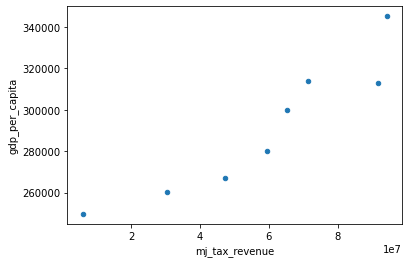

In [45]:
wa_plot_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

## Checking Correlation

In [46]:
import scipy.stats as stats

In [47]:
wa_plot_df.corr()

,year,gdp_per_capita,mj_tax_revenue
year,1.000000,0.982040,0.977128
gdp_per_capita,0.982040,1.000000,0.929298
mj_tax_revenue,0.977128,0.929298,1.000000


#### 1. r: Pearson’s correlation coefficient
#### 2. p-value: long-tailed p-value

In [48]:
stats.pearsonr(wa_plot_df['gdp_per_capita'], wa_plot_df['mj_tax_revenue'])

(0.929298241290244, 0.0008373601821339024)

## Differences

In [49]:
diff_df = wa_plot_df.diff()
diff_df

,year,gdp_per_capita,mj_tax_revenue
0,NaN,NaN,NaN
1,1.0,10709.191722,24549000.0
2,1.0,6546.053431,16675000.0
3,1.0,12991.116751,12198000.0
4,1.0,19992.109558,5948000.0
5,1.0,14106.093280,5998000.0
6,1.0,-956.661938,20487000.0
7,1.0,31925.077058,2454000.0


In [50]:
diff_df = diff_df.dropna()

<AxesSubplot:xlabel='mj_tax_revenue', ylabel='gdp_per_capita'>

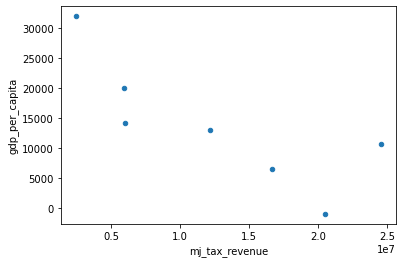

In [51]:
diff_df.plot.scatter(y="gdp_per_capita", x="mj_tax_revenue") 

In [52]:
stats.pearsonr(diff_df['gdp_per_capita'], diff_df['mj_tax_revenue'])

(-0.7927258052577149, 0.03348166301171394)

## Linear Regression

In [53]:
import statsmodels.formula.api as smf

In [54]:
res2 = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=wa_plot_df).fit() 
res2.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     37.99
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           0.000837
Time:                        15:27:05   Log-Likelihood:                -85.941
No. Observations:                   8   AIC:                             175.9
Df Residuals:                       6   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.326e+05   1.05e+04     22.048      0.000    2.07e+05    2.58e+05
mj_tax_revenue     0.0010      0.000      6.163      0.001       0.001       0.001
==============================================================================
Omnibus:                        1.881   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                0.760
Skew:                           0.173   Prob(JB):                        0.684
Kurtosis:                       1.530   Cond. No.                     1.49e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
res = smf.ols(formula="gdp_per_capita ~ mj_tax_revenue", data=diff_df).fit() 
res.summary()

/Users/jonathanho/opt/anaconda3/envs/VirtEnv/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         gdp_per_capita   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     8.456
Date:                Wed, 06 Jul 2022   Prob (F-statistic):             0.0335
Time:                        15:27:05   Log-Likelihood:                -70.666
No. Observations:                   7   AIC:                             145.3
Df Residuals:                       5   BIC:                             145.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.614e+04   5042.965      5.184      0.004    1.32e+04    3.91e+04
mj_tax_revenue    -0.0010      0.000     -2.908      0.033      -0.002      -0.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.692
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.747
Skew:                           0.502   Prob(JB):                        0.688
Kurtosis:                       1.754   Cond. No.                     2.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""